<a href="https://colab.research.google.com/github/delazaro/Patrones/blob/main/InvCorta3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Investigacion corta #3 **





Investigación Corta #3 (Individual)
Crear un ambiente de trabajo (.ipynb) basado en PYTHON3 y llamarle InvCorta-3.ipynb, con las librerías que considere oportuno.
El objetivo de la Investigación Corta #3 consiste en elegir un conjunto de datos de baja-mediana complejidad y aplicarle algunos algoritmos supervisados de su elección, de la siguiente forma:
1. Una vez definida la ruta de acción a partir de sus datos y el tipo de problema a atacar (predicción o clasificación), debe aplicar 3 métodos de los vistos en clase, haciendo el análisis completo de los resultados que obtenga y modificando los hiper-parámetros de acuerdo a su problema particular. De ser necesario un pre-procesado, debe llevarlo a cabo.
2.  Ejecutar el mismo an´alisis anterior pero esta vez para un m´etodo de ensamble que no se haya visto en clase.
3.  Explique en que consisten los m´etodos de ensamble y cu´ales son sus principales características.
4. No olvide el análisis científico que se espera de esta tarea, justifique en todo momento los resultados y haga un buen uso de la Notebook.

El entregable consiste en el url de la notebook InvCorta-3.ipynb en GITHUB.
Enviar por email (fmeza@itcr.ac.cr) el url a más tardar el jueves 22 de julio antes de las 3:59pm, envíos pasado el limite de entrega se aplicará la penalización discutida en clase.

**Descripcion del data set seleccionado** 

**Se selecciona un dataset de clasificacion de 2 clases que contiene 13 diferentes atributos o features de los cuales por motivo de la investigacion corta 3 se utilizaran solamente 6**

Context and Content

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

***Features***

Attribute Information:

There are 13 attributes:

**age**: age (in years)

**sex**: gender (1 = male; 0 = female)

**cp**: chest pain type

There are three criteria for classifying different types of angina (chest pain) under three categories (according to this NCBI paper: https://pubmed.ncbi.nlm.nih.gov/20494662/):

◼ Location: Chest pain occurs around the substernal portion of the body

◼ Cause: Pain is experienced after induction of emotional/physical stress

◼ Relief: The pain goes away after taking nitroglycerine and/or a rest

-- 0: typical angina (all criteria present)

-- 1: atypical angina (two of three criteria satisfied)

-- 2: non-anginal pain (less than one criteria satisfied)

-- Value 3: asymptomatic (none of the criteria are satisfied)

**trestbps**: resting blood pressure (in mmHg, upon admission to the hospital)

**chol**: serum cholesterol in mg/dL

**fbs**: fasting blood sugar > 120 mg/dL (likely to be diabetic) 1 = true; 0 = false

**restecg**: resting electrocardiogram results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) - more on the effects of these below

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach**: maximum heart rate achieved

**exang**: exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest)

**slope**: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia (according to this research paper on NCBI: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7027664/)

-- Value 0: upsloping

-- Value 1: flat

-- Value 2: downsloping

**ca**: number of major vessels (0-3) colored by fluoroscopy. Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue).

Radioactive dye is introduced to the body followed by x-ray imaging to detect any structural abnormalities present in the heart. The quantity of vessels colored is positively correlated with presence of heart disease.

**thal**: 0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)

Thallium testing is a method where the radioactive element thallium (Tl) is introduced to the body through an IV injection, followed by nuclear imaging of the heart with a gamma camera which reveals structural issues and abnormalities of the heart by showing whether if the isotope was absorbed by heart tissue under high (exercise) and low (rest) stress conditions.

**target**: 0 = no disease, 1 = disease




* **Importando las librerias requeridas y tambien importando en el ambiente el data set a utlizar** 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


hd = pd.read_csv("https://raw.githubusercontent.com/delazaro/Patrones/15181283ef432797a76decd9ef424f77901c262a/heart.csv")

hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Para efecto del la investigacion corta 3 voy a trabajar unicamente con los features de age , sex, cp , trestpbs , chol y ca. Esto porque son los mas entendibles para analizar y hacer conclusiones. 

### ***LOGISTIC REGRESSION***

Utilizando todos los features del dataset original encontre que tanto los scores de  training como el testing tenian un valor de 100%. La unica forma de cambiarlos fue aumentando el test_size hasta un 65% , dejando solo 35% de los datos para training.  
Al reducir la cantidad de features se encontraron valores mas "normales" de scores de training y testing con un test_size de 25% ( rule of thumb segun literatura) 
Por lo tanto para efecto de la investigacion corta 3 voy a trabajar unicamente con los features de "age" , "sex" , " cp , "trestpbs" , "chol" y "ca". Adicionalmente estos features son los mas entendibles para analizar y hacer conclusiones 



In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = hd[['age','sex','cp','trestbps','chol','ca']]
Y = hd['target']

# Se utlizat un test size del 25% ya que en las lecturas es un " rule of thumb "
X_train, X_test, y_train, y_test = train_test_split(X ,Y, test_size = 0.25 , random_state=20) 
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.4f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.4f}".format(logreg.score(X_test, y_test)))

Training set score: 0.7709
Test set score: 0.8026


Se hace una curva de training/test socores para un rango de 0-100 del hiper-parametro C. Aqui se encuentra que con un valor de C de 35 tenemos un valor maximo de training accuracy y cercano al accuracy del testing (ambos aproximadamente 79%). Cabe resaltar que el test accuracy se mantiene en un valor continuo del 79% cuando C es aproxidamente mayor a 5. C siendo menor a 5 aumenta el accuracy de testing pero se sacrifica el accuracy del training. 

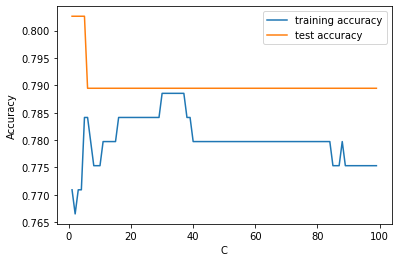

In [3]:
training_acc = []
test_acc = []

rango = range(1, 100)
for c in rango:
    # se construye el modelo de clasificacion
    clf = LogisticRegression(C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(clf.score(X_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

### ***DECISION TREES***

Aqui voy a utlizar los mismos 6 features utlizados anteriormente. Los datos ya se encuentran cargados , pero se vuelven a dividir en el datos de training y testing. Se ejecuta el clasificador y se imprimen los resultados 

In [4]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.763


El training set se ajusta 100% por lo que estamos al frente de un arbol puro que genera overfitting. Como se vio en clase y en la literatura una opcion es limitar la profundida del arbol. Vamos a probar con 4 , 5 y 6 niveles 

In [5]:
rango = range(4,7)
for Depth in rango: 
  tree = DecisionTreeClassifier(max_depth=Depth, random_state=0)
  tree.fit(X_train, y_train)
  print("Accuracy on Max depth ", Depth)
  print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
  print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on Max depth  4
Accuracy on training set: 0.841
Accuracy on test set: 0.763
Accuracy on Max depth  5
Accuracy on training set: 0.890
Accuracy on test set: 0.803
Accuracy on Max depth  6
Accuracy on training set: 0.943
Accuracy on test set: 0.789


Vemos que un nivel de 5 tiene un mejor resultado en testing y un valor de entrenamiento que nos aleja del overfitting. 


Ahora se va a mostrar la importancia de cada atributo : 

In [6]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.21896165 0.04242496 0.18255139 0.14560596 0.09649128 0.31396477]


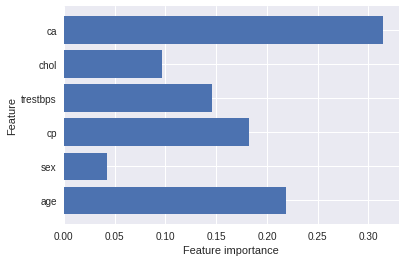

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

def plot_feature_importances_heart(model):
    n_features = 6
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ['age','sex','cp','trestbps','chol','ca'])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_heart(tree)

Como vemos el fixture con mas importancia en este modelo es ca(el numero de vasos sanguineos que se colorean durante fluroscopia). Lo cual resulta logico porque indica la cantidad de vasos que no tienen un flujo normal , por lo que el constraste es visible 

### ***kNN NEAREST NEIGHBOR***

Primero se cargan las librerias necesarias y se vuelven a definir los parametros de testing , validacion y test size. Como buena practica se reinician las listas test y training accuracy. 

Luego como vimos en la clase se grafican las curvas de acuracy de testing y training contra los valores de K neighbors

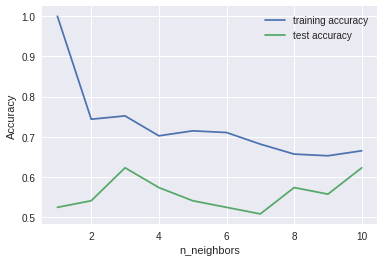

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X ,Y, test_size = 0.2 , random_state=42) 

training_accuracy = []
test_accuracy = []

import matplotlib.pyplot as plt
%matplotlib inline

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Como vemos evaluando en el Nearest Neigbors = 3 tenemos el valor mas alto de accuracy de testing (62%). Este es un valor bajo pero en con ese K el valor del training no se ve comprometido al overfitting 

In [28]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)


print("Accuracy:",result2)



Confusion Matrix:
[[16 13]
 [10 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        29
           1       0.63      0.69      0.66        32

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.62      0.62      0.62        61

Accuracy: 0.6229508196721312


*** ADICIONAL : CONOCIENDO LOS DATOS ***


Por aqui me parecio interesante realizar un pair plot en el set de entrenamiento para revisar las correlaciones de los datos.  Como se ve en el plot generado los data points estan coloreados deacuerdo a su resultado en target ( 1 o 0 dependiende de si se encontro o no enfermedad cardiaca). 
Del los graficos se puede observar que las dos clases no estan bien separadas por ninguno de los features. Esto es definitivamente un reto para el diseno del machine learning 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9aa440bd0>,
      dtype=object)

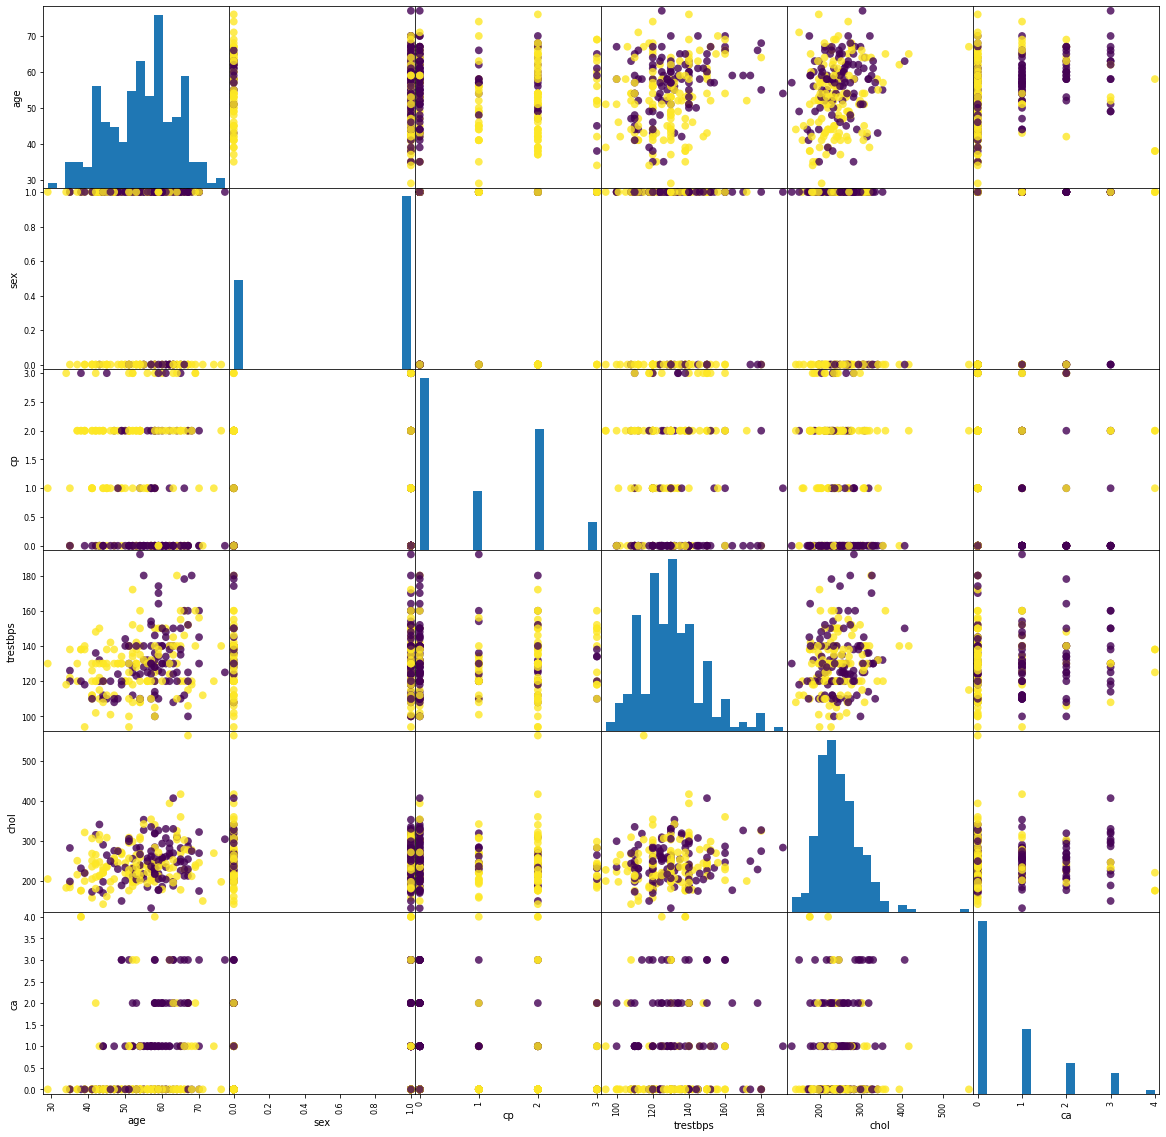

In [ ]:
import pandas as pd

hd_dataframe= pd.DataFrame(X_train,columns= ['age','sex','cp','trestbps','chol','ca'])
pd.plotting.scatter_matrix(hd_dataframe,c=y_train,figsize=(20,20),marker='o',hist_kwds={'bins':20},s=60,alpha=.8)

## **CONCLUSION**

De los metodos evaluados : 

Logistic Regression con 

Training set score: 0.7709
Test set score: 0.8026

Desicion Tree con 

Accuracy on training set: 0.890
Accuracy on test set: 0.803

Y con KNN 

Accuracy on training set: aprox 0.75
Accuracy on test set: 0.62


Podemos concluir que el modelo con mejor resultado es el de Desicion Tree con una profundidad de 5 niveles donde ambos valores estan en los rangos de los 80s por lo que no caemos en el overfitting ni en el underfitting 
